Sequence transduction tasks require large parallel corpora to get $p(y|x)$. Small changes to translation rules require large updates to data and tuning. How to make models adapt online with little data?

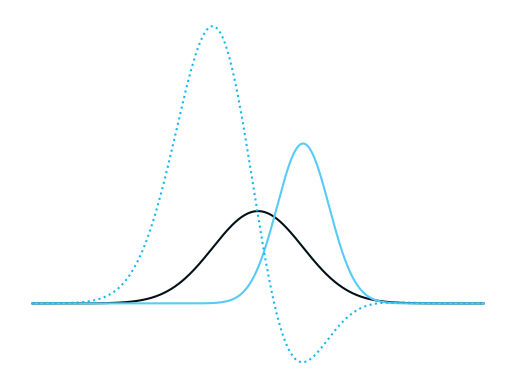

In [62]:
#| code-fold: true
#| fig-alt: "doodle: divergence of two distributions"

import matplotlib.pyplot as plt
import torch
x = torch.linspace(-5,5,1000)
p_x = torch.exp(-0.5*x**2)
p_x = p_x/p_x.sum()
p_y = torch.exp(-1.5*(x-1)**2)
p_y = p_y/p_y.sum()
divergence = p_x*(p_x/p_y).log()
plt.axis('off')
plt.plot(x, p_x/p_x.sum(), color='#011117')
plt.plot(x, p_y/p_y.sum(), color='#56cbf7')
plt.plot(x, divergence, color='#16b8f3', linestyle=':');


Drifts in target languages (e.g. recently acquired consensus on new spelling or grammar rules, [new words](https://twitter.com/NYT_first_said)) or in corpora curation rules (e.g. decision to include punctuation in speech recognition output) require actions like dataset balancing, retraining or costly hyperparameter retuning to account for substantial changes in the data distribution.

Drifts in source languages, such as shifts in speaker characteristic like accents or code switching, channel characteristics like environment noise or reverbertaion, or capture device conditions like EMG body sensor positions require extensive multi-condition training efforts (augmentation design) and condition adaptation.

To make deep learning work well in all source and target language conditions users need to ensure that all data is properly curated and balanced, on top of having to deal with architecture-specific issues like sequence length generalization or hyperparameter tuning due to dataset size mismatch.

The curator is required to decide what parts of data distribution require attention to improve performance. The objective of getting the system to perform better on a held out test set can be with odds to the objective of equally representing all users.

Curation of consistent parallel corpora is a tedious task that requires that a large batch of updates (e.g. 1-10 hours worth of sentences) is done offline, and only then a model is retrained or fine-tuned using a slow learning algorithm like SGD. Getting an SGD-based system to immediately adjust its output based on a single training example (e.g. correction of a single) word is very hard. Even though [SGD converges exponentially fast](https://fa.bianp.net/blog/2021/exponential-sgd/).

Current deep learning systems work quite well on estimating densities like $p(x)$ and $p(y)$ and with addition of discrete tokenizers it becomes much easier to estimate $p(x,y)$ jointly.

It's often easy small amounts of $x$ and $y$ and perform density adaptation of large pretrained models with adapters.

Adaptation of translation rules seems to be much harder to get right and requires a lot of tweaking. Given densities, we would like to perform translation, synthesis or recognition. Can we delay binding of translation rules so that users can bring their own? Learn what it means to learn to translate separately from actual translation rules.